In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
data = pd.read_csv('renfe.csv')

for i in ['insert_date','start_date','end_date']:
    data[i] = pd.to_datetime(data[i])


data['price'] = data['price'].fillna(data['price'].mean())
data = data.dropna()


data['start_end_hour'] = data['end_date'] - data['start_date']
data['start_end_hour'] = data['start_end_hour']/np.timedelta64(1,'h')
data['insert_month'] = data['insert_date'].dt.month
data['insert_day'] = data['insert_date'].dt.day
data['insert_hour'] = data['insert_date'].dt.hour
data['insert_min'] = data['insert_date'].dt.minute
data['insert_sec'] = data['insert_date'].dt.second

data = data.drop(['insert_date','start_date','end_date'],1)

one_hot_encoding = pd.get_dummies(data[['origin','destination','train_type','train_class','fare']])
data = data.drop(['origin','destination','train_type','train_class','fare'],1)
data = pd.concat([one_hot_encoding, data], axis=1)

data = data.astype(np.float)

X = data.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
                  ,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,
                  39,40,41,42,43,44,46,47,48,49,50,51]]
Y = data.iloc[:, [45]]


X_train1, X_test1, y_train1, y_test1 = train_test_split(X.values, Y.values, test_size=.9, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train1, y_train1, test_size=.1, random_state=42)

In [38]:
model = GradientBoostingRegressor(n_estimators=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)
R2 = r2_score(y_test, y_pred)
print(R2)
score_train = model.score(X_train, y_train)
print(score_train)
score_test = model.score(X_test,y_test)
print(score_test)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


248.60489320449372
0.5972291156556392
0.5964734993512872
0.5972291156556392


In [39]:
cv=ShuffleSplit(n_splits=10,test_size=0.1,random_state=42)

def plot_curve():
    # instantiate
    model = GradientBoostingRegressor(n_estimators=10)

    # fit
    model.fit(X_train1, y_train1)
    train_sizes, train_scores, test_scores = learning_curve(model, X_train1, y_train1, 
                                                            n_jobs=-1, cv=cv, 
                                                            train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit, ax=plt.subplots()
    #plt.figure()
    ax.set_title("Boosting")
    ax.legend(loc="best")
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    #ax.gca().invert_yaxis()
    
    # box-like grid
    ax.grid()
    
    # plot the std deviation as a transparent range at each training set size
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    ax.set_ylim(0.5,1)
    legend = ax.legend()
    plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


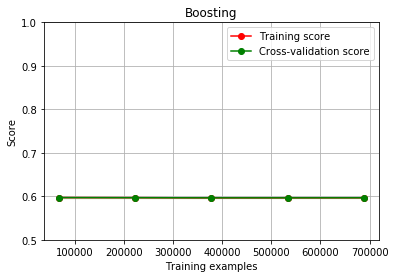

In [40]:
plot_curve()